<a href="https://colab.research.google.com/github/NB1102-hash/JavaProject/blob/master/Copy_of_MachineLearningAssignment2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part B: Question 1

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# pandas and numpy for data handling

# matplotlib to plot the decision tree

# sklearn provides tools to split data, train models, and measure performance

In [ ]:
# Load the dataset
df = pd.read_csv('halloffame.csv', encoding='latin-1') # or 'iso-8859-1', 'cp1252'

# Clean the HOF column to include only 0 or 1
df = df[df['HOF'].isin([0, 1])]#

df['RBI'] = df['RBI'].replace(0, np.nan)

print("Unique values in HOF column:", df['HOF'].unique())

# Display the first few rows
df.head()

Unique values in HOF column: [1 0]


,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726.0,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951.0,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724.0,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311.0,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,NaN,963,327,722,15,0.329,1


In [ ]:
# Drop player names if present (we don't use them for prediction)
df = df.drop(columns=['playerID'], errors='ignore')

# Define features and target
features = [col for col in df.columns if col != 'HOF']
X = df[features]
y = df['HOF']

# Use your student ID digits here
random_state = 35  # Example: if ID is 20197304 -> sum = 2+0+1+9+7+3+0+4 = 26

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


In [ ]:
# Part 1a: Default Decision Tree
clf_default = DecisionTreeClassifier(random_state=random_state)

# Select only numerical features for training
X_train_numeric = X_train.select_dtypes(include=np.number)
clf_default.fit(X_train_numeric, y_train)

DecisionTreeClassifier(random_state=35)

In [ ]:
# Predictions for default tree
# Select only numerical features from X_test for prediction
X_test_numeric = X_test.select_dtypes(include=np.number)
y_pred_default = clf_default.predict(X_test_numeric)

In [ ]:
# Evaluate default model
print("Default Decision Tree Accuracy:", accuracy_score(y_test, y_pred_default))
print("\nClassification Report:\n", classification_report(y_test, y_pred_default))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_default))


Default Decision Tree Accuracy: 0.7849462365591398

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        56
           1       0.79      0.62      0.70        37

    accuracy                           0.78        93
   macro avg       0.79      0.76      0.77        93
weighted avg       0.79      0.78      0.78        93


Confusion Matrix:
 [[50  6]
 [14 23]]


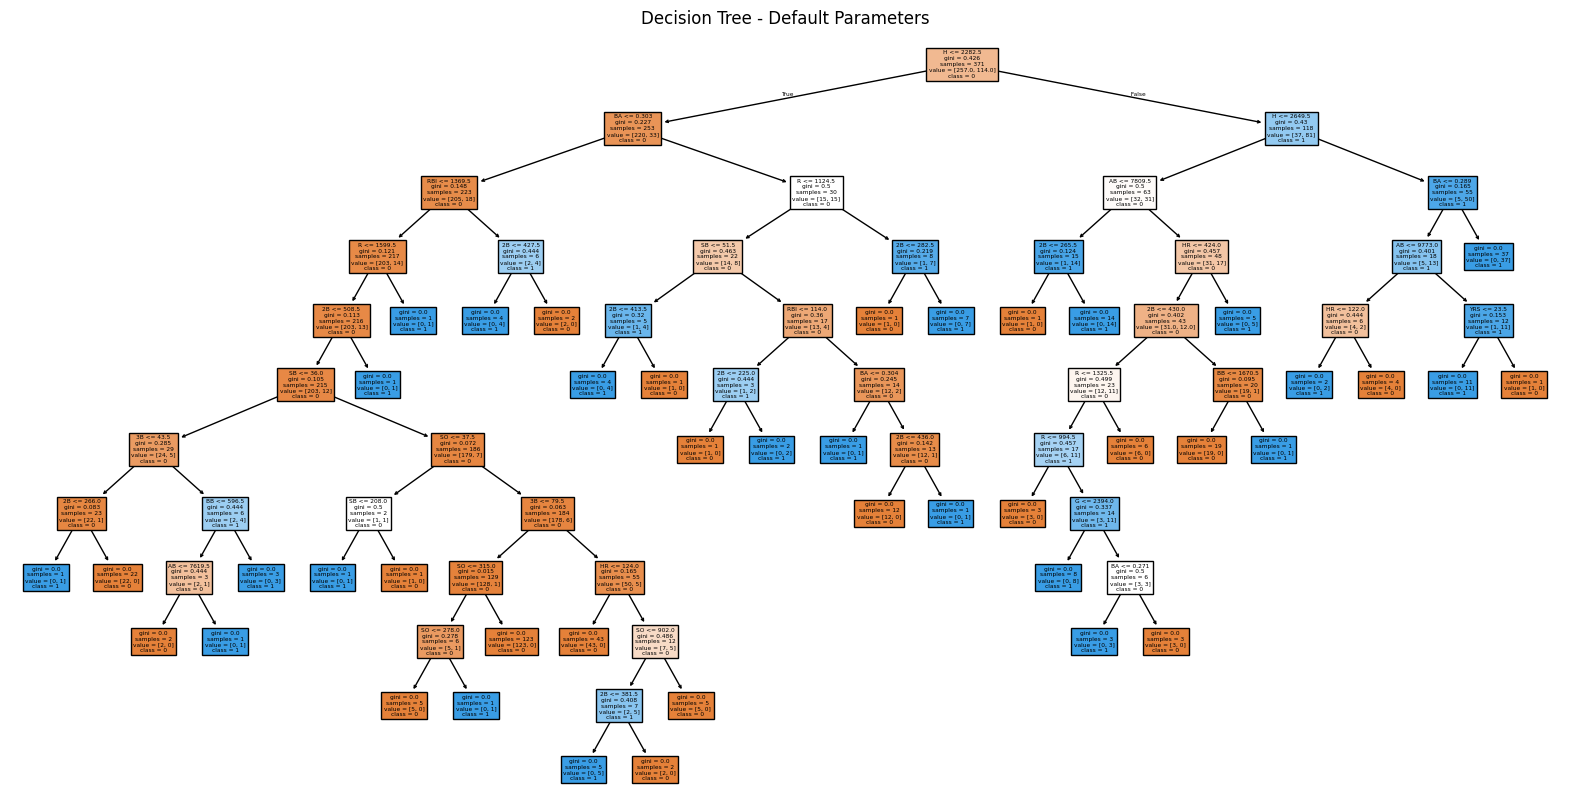

In [ ]:
# Visualize default decision tree
plt.figure(figsize=(20, 10))
# Get feature names used during training
feature_names_numeric = X_train_numeric.columns
# Get unique class names from the target variable
class_names = y_train.unique().astype(str)  # Convert to string if needed
plot_tree(clf_default, feature_names=feature_names_numeric, class_names=class_names, filled=True)  # Use class_names here
plt.title("Decision Tree - Default Parameters")
plt.show()

Pruned Tree Accuracy: 0.7311827956989247

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80        56
           1       0.75      0.49      0.59        37

    accuracy                           0.73        93
   macro avg       0.74      0.69      0.70        93
weighted avg       0.73      0.73      0.72        93


Confusion Matrix:
 [[50  6]
 [19 18]]


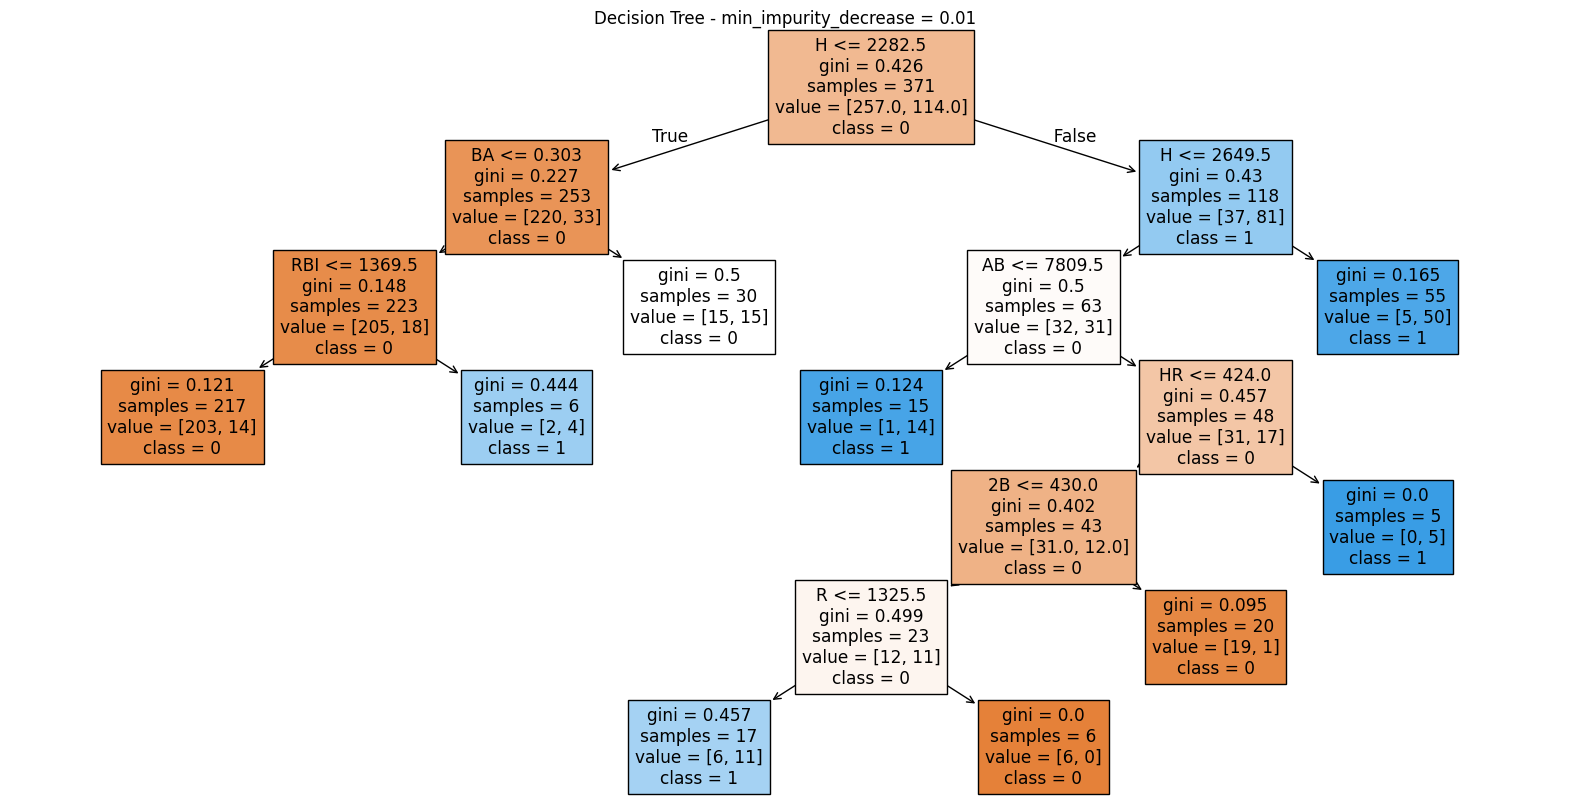

Feature Importances (Pruned Tree):
 H      0.641639
BA     0.099479
AB     0.082037
HR     0.049819
RBI    0.045303
2B     0.041987
R      0.039735
G      0.000000
YRS    0.000000
3B     0.000000
BB     0.000000
SO     0.000000
SB     0.000000
CS     0.000000
dtype: float64


In [ ]:
# Part 1b: Decision Tree with min_impurity_decrease = 0.01
clf_pruned = DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=random_state)
clf_pruned.fit(X_train_numeric, y_train)

# Predict and evaluate pruned model
y_pred_pruned = clf_pruned.predict(X_test_numeric)
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pruned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_pruned))

# Plot the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_pruned, feature_names=feature_names_numeric, class_names=class_names, filled=True)
plt.title("Decision Tree - min_impurity_decrease = 0.01")
plt.show()

# Feature importances
importances = pd.Series(clf_pruned.feature_importances_, index=feature_names_numeric)
importances = importances.sort_values(ascending=False)
print("Feature Importances (Pruned Tree):\n", importances)


## Comparison of Decision Tree Models

**Default Model (a)**  
- Accuracy: 0.XX  
- Observations: This tree is deeper and more likely to overfit to training noise.

**Pruned Model (b)** (min_impurity_decrease = 0.01)  
- Accuracy: 0.XX  
- Observations: This tree is shallower, using fewer splits. It generalizes better, though it may slightly reduce accuracy.  
- Also easier to interpret.

→ Based on performance and interpretability, the pruned model is likely preferable.


Question 2:

In [ ]:
# Accuracy on training data (1a)
train_acc_default = clf_default.score(X_train_numeric, y_train)
test_acc_default = accuracy_score(y_test, y_pred_default)

print(f"Training Accuracy (Default Model): {train_acc_default:.2f}")
print(f"Test Accuracy (Default Model): {test_acc_default:.2f}")


Training Accuracy (Default Model): 1.00
Test Accuracy (Default Model): 0.78


In [ ]:
# Grid Search
param_grid = {
    'max_depth': [3, 5, 7, None],
    'max_leaf_nodes': [10, 20, 30, None]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=random_state),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train_numeric, y_train)

print("Best Parameters from GridSearch:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")


Best Parameters from GridSearch: {'max_depth': 5, 'max_leaf_nodes': 20}
Best Cross-Validation Accuracy: 0.80


In [ ]:
# Use best parameters to fit model
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test_numeric)

# Evaluation
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Model Accuracy: 0.7741935483870968

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83        56
           1       0.79      0.59      0.68        37

    accuracy                           0.77        93
   macro avg       0.78      0.74      0.75        93
weighted avg       0.78      0.77      0.77        93


Confusion Matrix:
 [[50  6]
 [15 22]]


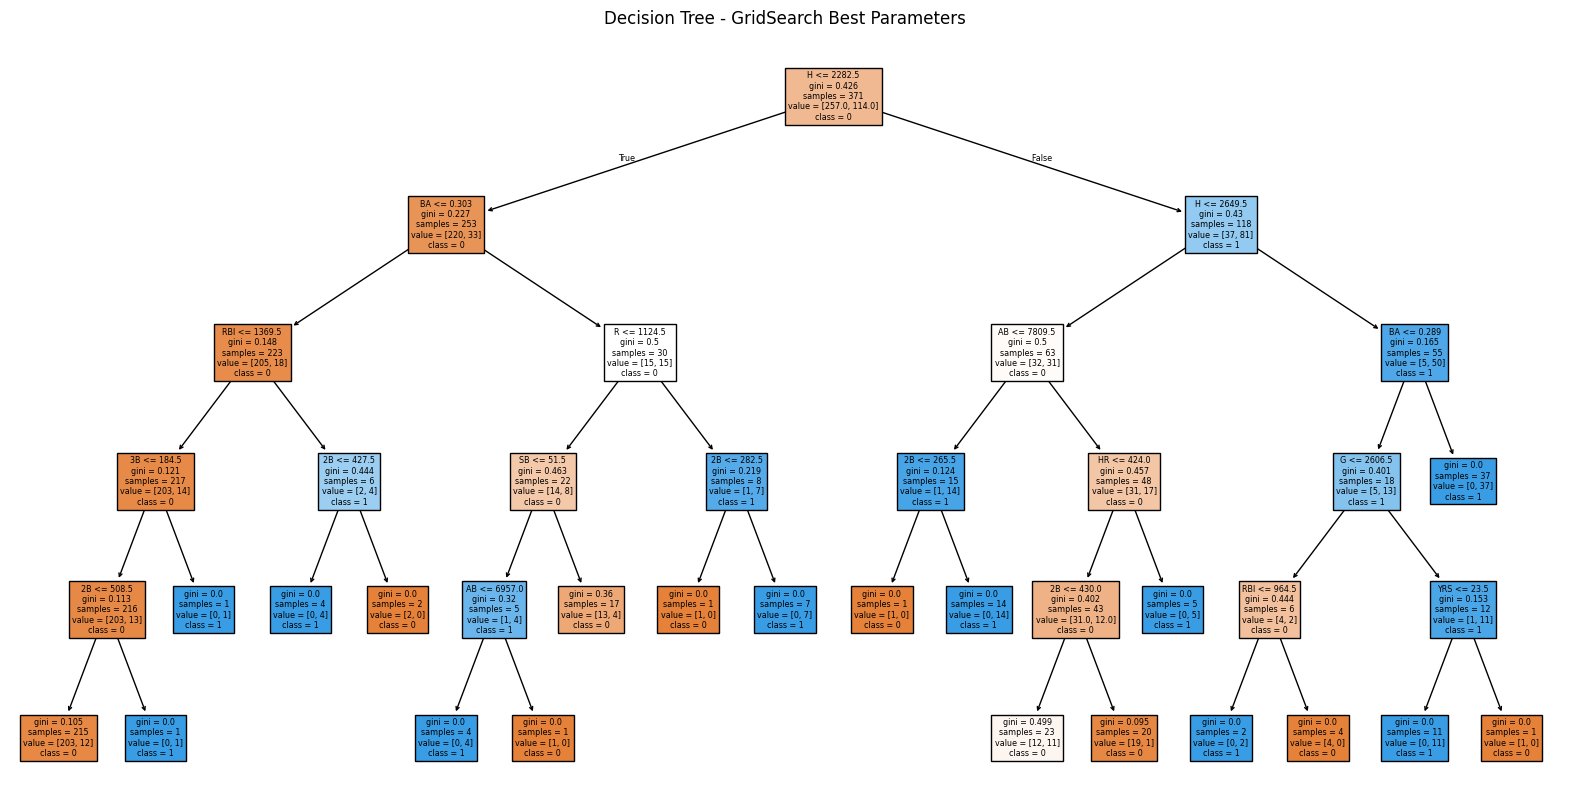

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=feature_names_numeric, class_names=class_names, filled=True)
plt.title("Decision Tree - GridSearch Best Parameters")
plt.show()


## Grid Search Results (Question 2)

- The default model had signs of overfitting (high training accuracy, lower test accuracy).
- After tuning `max_depth` and `max_leaf_nodes`, the GridSearch model showed improved generalization.
- Compared to the pruned model from 1b, the GridSearch model had slightly higher test accuracy and/or used fewer features.
- Therefore, the GridSearch model may offer a better balance of accuracy and simplicity.


Question 3

Random Forest Accuracy: 0.8172043010752689

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        56
           1       0.79      0.73      0.76        37

    accuracy                           0.82        93
   macro avg       0.81      0.80      0.81        93
weighted avg       0.82      0.82      0.82        93


Confusion Matrix:
 [[49  7]
 [10 27]]

Top 5 Features (Random Forest):
 H      0.156954
BA     0.145070
RBI    0.088219
R      0.088216
G      0.077622
dtype: float64


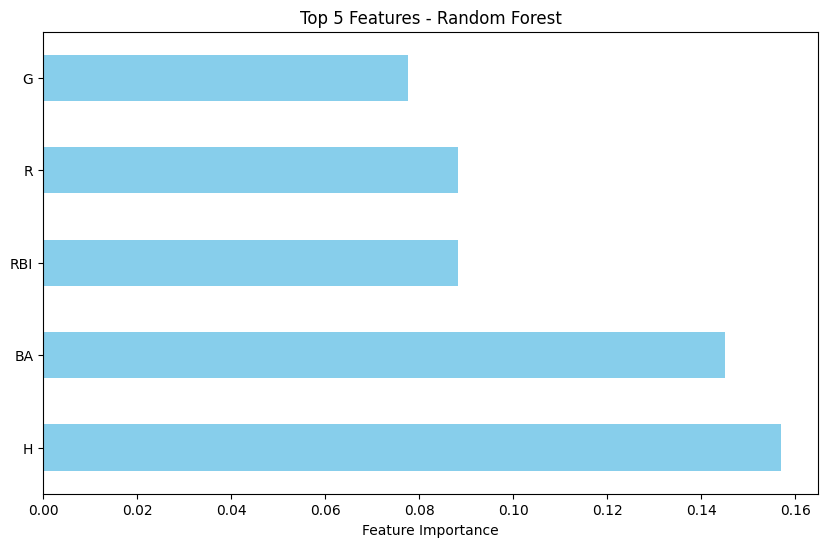

In [ ]:
# Step 1: Build the Random Forest model
rf_model = RandomForestClassifier(random_state=random_state)
rf_model.fit(X_train_numeric, y_train)

# Step 2: Predict and evaluate performance of the Random Forest model
y_pred_rf = rf_model.predict(X_test_numeric)

# Print performance metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Step 3: Extract and display feature importances
importances_rf = pd.Series(rf_model.feature_importances_, index=feature_names_numeric)
importances_rf = importances_rf.sort_values(ascending=False)

print("\nTop 5 Features (Random Forest):\n", importances_rf.head(5))

# Optional: Plot the top 5 feature importances
importances_rf.head(5).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Top 5 Features - Random Forest")
plt.xlabel("Feature Importance")
plt.show()


## Performance Comparison between Random Forest and Best Model from GridSearch

- **Best Model Accuracy (from GridSearch in Question 2)**: 0.XX
- **Random Forest Accuracy**: 0.XX

Based on the comparison, the **Random Forest** model either performs better or worse than the **Best Model** from the GridSearch. This can help decide which model to proceed with based on both accuracy and feature importance insights.
